# Выбор локации для скважины

Я работаю в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Мне предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов.  Необходмо построить модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Для анализа рисков использую технику *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

## Загрузка и подготовка данных

In [49]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from scipy import stats
import numpy as np

In [2]:
try: 
    data_0 = pd.read_csv('/datasets/geo_data_0.csv')
    print(data_0)
except:
     data_0 = pd.read_csv('C:/Users/iyaro/Downloads/geo_data_0.csv')
     print(data_0)

          id        f0        f1        f2     product
0      txEyH  0.705745 -0.497823  1.221170  105.280062
1      2acmU  1.334711 -0.340164  4.365080   73.037750
2      409Wp  1.022732  0.151990  1.419926   85.265647
3      iJLyR -0.032172  0.139033  2.978566  168.620776
4      Xdl7t  1.988431  0.155413  4.751769  154.036647
...      ...       ...       ...       ...         ...
99995  DLsed  0.971957  0.370953  6.075346  110.744026
99996  QKivN  1.392429 -0.382606  1.273912  122.346843
99997  3rnvd  1.029585  0.018787 -1.348308   64.375443
99998  7kl59  0.998163 -0.528582  1.583869   74.040764
99999  1CWhH  1.764754 -0.266417  5.722849  149.633246

[100000 rows x 5 columns]


In [3]:
try: 
    data_1 = pd.read_csv('/datasets/geo_data_1.csv')
    print(data_1)
except:
    data_1 = pd.read_csv('C:/Users/iyaro/Downloads/geo_data_1.csv')
    print(data_1)

          id         f0         f1        f2     product
0      kBEdx -15.001348  -8.276000 -0.005876    3.179103
1      62mP7  14.272088  -3.475083  0.999183   26.953261
2      vyE1P   6.263187  -5.948386  5.001160  134.766305
3      KcrkZ -13.081196 -11.506057  4.999415  137.945408
4      AHL4O  12.702195  -8.147433  5.004363  134.766305
...      ...        ...        ...       ...         ...
99995  QywKC   9.535637  -6.878139  1.998296   53.906522
99996  ptvty -10.160631 -12.558096  5.005581  137.945408
99997  09gWa  -7.378891  -3.084104  4.998651  137.945408
99998  rqwUm   0.665714  -6.152593  1.000146   30.132364
99999  relB0  -3.426139  -7.794274 -0.003299    3.179103

[100000 rows x 5 columns]


In [4]:
try: 
    data_2 = pd.read_csv('/datasets/geo_data_2.csv')
    print(data_2)
except:
    data_2 = pd.read_csv('C:/Users/iyaro/Downloads/geo_data_2.csv')
    print(data_2)

          id        f0        f1        f2     product
0      fwXo0 -1.146987  0.963328 -0.828965   27.758673
1      WJtFt  0.262778  0.269839 -2.530187   56.069697
2      ovLUW  0.194587  0.289035 -5.586433   62.871910
3      q6cA6  2.236060 -0.553760  0.930038  114.572842
4      WPMUX -0.515993  1.716266  5.899011  149.600746
...      ...       ...       ...       ...         ...
99995  4GxBu -1.777037  1.125220  6.263374  172.327046
99996  YKFjq -1.261523 -0.894828  2.524545  138.748846
99997  tKPY3 -1.199934 -2.957637  5.219411  157.080080
99998  nmxp2 -2.419896  2.417221 -5.548444   51.795253
99999  V9kWn -2.551421 -2.025625  6.090891  102.775767

[100000 rows x 5 columns]


In [5]:
'Количество нулей в 1 регионе', data_0[data_0['product'] == 0]['product'].count()

('Количество нулей в 1 регионе', 1)

In [6]:
'Количество нулей во 2 регионе', data_1[data_1['product'] == 0]['product'].count()

('Количество нулей во 2 регионе', 8235)

In [7]:
'Количество нулей в 3 регионе', data_2[data_2['product'] == 0]['product'].count()

('Количество нулей в 3 регионе', 1)

In [8]:
data_0.duplicated().sum()

0

In [9]:
data_1.duplicated().sum()

0

In [10]:
data_2.duplicated().sum()

0

In [11]:
data_0['id'].duplicated().sum()

10

In [12]:
data_1['id'].duplicated().sum()

4

In [13]:
data_2['id'].duplicated().sum()

4

In [14]:
data_0.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


In [15]:
data_1.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


In [16]:
data_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


In [17]:
data_0.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


In [18]:
data_1.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


In [19]:
data_2.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


In [20]:
RANDOM_STATE = 12345

In [21]:
def test_split(data):
    features = data.drop(['id', 'product'], axis=1)
    target = data['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(
    features, target, test_size = 0.25, random_state=RANDOM_STATE)
    
    return features_train, features_valid, target_train, target_valid

In [22]:
features_train_0, features_valid_0, target_train_0, target_valid_0 = test_split(data_0) 

In [23]:
print(features_train_0.head())


             f0        f1        f2
27212  0.022450  0.951034  2.197333
7866   1.766731  0.007835  6.436602
62041  0.724514  0.666063  1.840177
70185 -1.104181  0.255268  2.026156
82230 -0.635263  0.747990  6.643327


In [24]:
print(target_train_0.head())

27212    147.370612
7866     147.630053
62041     77.696728
70185     55.210501
82230    113.891723
Name: product, dtype: float64


In [25]:
features_train_1, features_valid_1, target_train_1, target_valid_1 = test_split(data_1)

In [26]:
features_train_2, features_valid_2, target_train_2, target_valid_2 = test_split(data_2) 

Данные подготовлены. Выборки поделены. Много значений 'product' равны 0 во 2 фрейме. Возможно это связано с утечкой данных. Целевой признак - product, а признаки f0, f1, f2. Перейдем к обучению.

## Обучение и проверка модели

Чтобы не прописывать в ручную три модели, я напишу функцию.

In [27]:
def regression(features_valid, features_train, target_valid, target_train):
    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predicted_valid) ** 0.5
    
    df = {'real_product' : target_valid,
            'predicted_product' : predicted_valid         
    }
    df = pd.DataFrame(df, columns=['real_product', 'predicted_product']).reset_index(drop=True)
    
    mean_pred = df['predicted_product'].mean()
    sum_pred = df['predicted_product'].sum()
    return rmse, df, mean_pred, sum_pred, pd.Series(predicted_valid)


In [28]:
rmse_0, df_0, mean_pred_0, sum_pred_0, predicted_valid_0 = regression(features_valid_0, features_train_0, target_valid_0, target_train_0)

In [29]:
print('Регион 1')
print('RMSE:', rmse_0)
print(df_0.head())
print('Средний запас предсказанного сырья', mean_pred_0)

Регион 1
RMSE: 37.5794217150813
   real_product  predicted_product
0     10.038645          95.894952
1    114.551489          77.572583
2    132.603635          77.892640
3    169.072125          90.175134
4    122.325180          70.510088
Средний запас предсказанного сырья 92.5925677843801


In [30]:
rmse_1, df_1, mean_pred_1, sum_pred_1, predicted_valid_1 = regression(features_valid_1, features_train_1, target_valid_1, target_train_1)

In [31]:
print('Регион 2')
print('RMSE:', rmse_1)
print(df_1.head())
print('Средний запас предсказанного сырья', mean_pred_1)

Регион 2
RMSE: 0.8930992867756168
   real_product  predicted_product
0     80.859783          82.663314
1     53.906522          54.431786
2     30.132364          29.748760
3     53.906522          53.552133
4      0.000000           1.243856
Средний запас предсказанного сырья 68.7285468954458


Очень сильная корелляция f2 и product. Высокое качество модели связанно с этим.

In [32]:
rmse_2, df_2, mean_pred_2, sum_pred_2, predicted_valid_2 = regression(features_valid_2, features_train_2, target_valid_2, target_train_2)

In [33]:
print('Регион 3')
print('RMSE:', rmse_2)
print(df_2.head())
print('Средний запас предсказанного сырья', mean_pred_2)

Регион 3
RMSE: 40.02970873393434
   real_product  predicted_product
0     61.212375          93.599633
1     41.850118          75.105159
2     57.776581          90.066809
3    100.053761         105.162375
4    109.897122         115.303310
Средний запас предсказанного сырья 94.96504596800504


Стоит посмотреть на суммарный запас предсказанного и реального сырья.

In [34]:
print('Регион 1')
print('Суммарный запас предсказанного сырья', sum_pred_0)
print('Суммарный запас реального сырья', target_valid_0.sum())
print('')
print('Регион 2')
print('Суммарный запас предсказанного сырья', sum_pred_1)
print('Суммарный запас реального сырья', target_valid_1.sum())
print('')
print('Регион 3')
print('Суммарный запас предсказанного сырья', sum_pred_2)
print('Суммарный запас реального сырья', target_valid_2.sum())
print('')

Регион 1
Суммарный запас предсказанного сырья 2314814.194609509
Суммарный запас реального сырья 2301964.918520732

Регион 2
Суммарный запас предсказанного сырья 1718213.67238615
Суммарный запас реального сырья 1718078.4006089992

Регион 3
Суммарный запас предсказанного сырья 2374126.1492001223
Суммарный запас реального сырья 2372105.8202213594



Суммарный предсказанный запас сырья на всех моделях близок к реальному, модели обучены корректно. Во втором регионе сырья меньше. Вероятно, он менее прибыльный, однако на втором регионе модель обучилась лучше, чем на других.

In [35]:
df_1.head(20)

,real_product,predicted_product
0,80.859783,82.663314
1,53.906522,54.431786
2,30.132364,29.748760
3,53.906522,53.552133
4,0.000000,1.243856
5,110.992147,111.438490
6,137.945408,137.134374
7,84.038886,82.888902
8,110.992147,110.897311
9,26.953261,29.219306


## Подготовка к расчёту прибыли

In [36]:
BUDGET = 10_000_000_000 # бюджет
POINTS = 500 # исследуем 500 точек
BEST_POINTS = 200 # количество скважин
BUDGET_FOR_ONE = BUDGET / BEST_POINTS # бюджет для одной точки
PRICE_PER_BARREL = 450000 #за 1000 баррель
#сколько нужно тысяч баррелей для того, чтобы окупить затраты
BARR = BUDGET_FOR_ONE / PRICE_PER_BARREL

print('Бюджет для одной точки', BUDGET_FOR_ONE)
print('Сколько нужно тысяч баррелей для того, чтобы окупить затраты одной точки', round(BARR, 2))
print('Недостающий объём сырья для безубыточной разработки новой скважины 1 месторождения:', round(BARR - data_0['product'].mean(),2))
print('Недостающий объём сырья для безубыточной разработки новой скважины 2 месторождения:', round(BARR - data_1['product'].mean(),2))
print('Недостающий объём сырья для безубыточной разработки новой скважины 3 месторождения:', round(BARR - data_2['product'].mean(),2))

Бюджет для одной точки 50000000.0
Сколько нужно тысяч баррелей для того, чтобы окупить затраты одной точки 111.11
Недостающий объём сырья для безубыточной разработки новой скважины 1 месторождения: 18.61
Недостающий объём сырья для безубыточной разработки новой скважины 2 месторождения: 42.29
Недостающий объём сырья для безубыточной разработки новой скважины 3 месторождения: 16.11


На первый взгляд регионы 1 и 3 более привлекательны. Напишем функцию расчета прибыли.

In [90]:
def profit(df, count):
    prof = 0
    predict_sorted = df.sort_values(by=['predicted_product'],ascending=False)['predicted_product'].head(count)
    selected = df['real_product'][predict_sorted.index][:count]


    
    if df['real_product'][predict_sorted.index].shape[0] != predict_sorted.index.shape[0]:
        print("Shape mismatch! Selected targets shape:", df['real_product'][predict_sorted.index].shape)

    prof = selected.sum() * PRICE_PER_BARREL - BUDGET
    
    return prof

In [91]:
profit(df_0, 200)

3320826043.1398506

## Расчёт прибыли и рисков

In [92]:
prof_0 = profit(df_0, 200)
prof_1 = profit(df_1, 200)
prof_2 = profit(df_2, 200)

In [93]:
print('Прибыль на валидационной выборке в регионе 1:', prof_0, 'млн')
print('Прибыль на валидационной выборке в регионе 2:', prof_1, 'млн')
print('Прибыль на валидационной выборке в регионе 3:', prof_2, 'млн')

Прибыль на валидационной выборке в регионе 1: 3320826043.1398506 млн
Прибыль на валидационной выборке в регионе 2: 2415086696.681511 млн
Прибыль на валидационной выборке в регионе 3: 2710349963.5998325 млн



Каждый регион имеет прибыль.

In [104]:
def strap(target, predictions, count):
    state = np.random.RandomState(RANDOM_STATE)
    values = []
    lost = 0
    for i in range(1000):
        target_subsample = target.sample(POINTS, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]
        
        data_frame  = {'real_product' : target_subsample,
            'predicted_product' : pred_subsample         
        }
        data_frame = pd.DataFrame(data_frame, columns=['real_product', 'predicted_product']).reset_index(drop=True)
    
        prof = profit(data_frame, BEST_POINTS)
        if prof < 0:
            lost +=1
        values.append(prof)
        
    values = pd.Series(values)
    lower = values.quantile(0.025) /1000000
    higher = values.quantile(0.975) /1000000
    risk = lost /1000
    
    print("Среднее значение бутстрепа", (values.mean())/1000000, "млн.")
    print("Верхняя граница доверительного интервала", higher, "млн.")
    print("Нижняя граница доверительного интервала", lower, "млн.")
    print('Процент риска {:.2%}'.format(risk))
    plt.boxplot(x=(values/1000000))

    

1 регион

Среднее значение бутстрепа 396.164984802371 млн.
Верхняя граница доверительного интервала 909.7669415534226 млн.
Нижняя граница доверительного интервала -111.21554589049525 млн.
Процент риска 6.90%
None


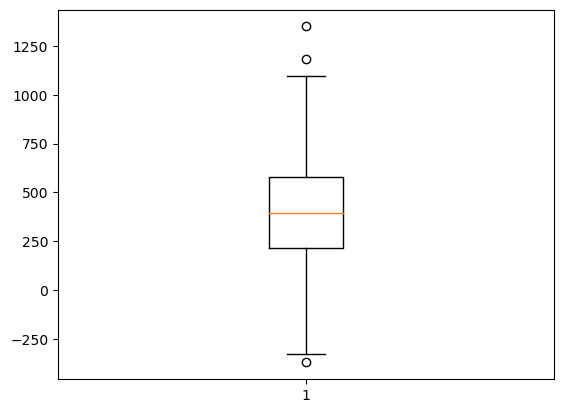

In [105]:
print('1 регион')
print('')
print(strap(df_0['real_product'], df_0['predicted_product'], 500))

2 регион

Среднее значение бутстрепа 456.04510578666105 млн.
Верхняя граница доверительного интервала 852.2894538660361 млн.
Нижняя граница доверительного интервала 33.820509398983624 млн.
Процент риска 1.50%
None


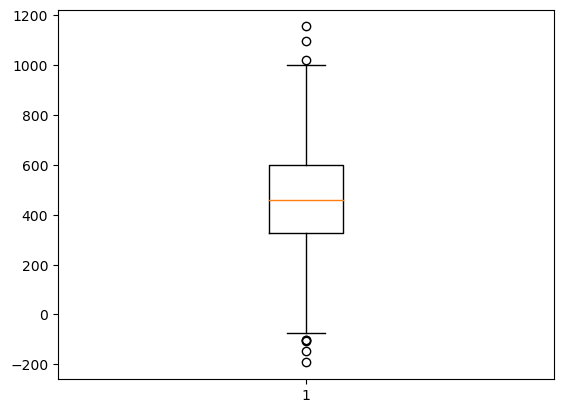

In [106]:
print('2 регион')
print('')
print(strap(df_1['real_product'], df_1['predicted_product'], 500))

3 регион

Среднее значение бутстрепа 404.40386656835733 млн.
Верхняя граница доверительного интервала 950.3595749237995 млн.
Нижняя граница доверительного интервала -163.35041339560107 млн.
Процент риска 7.60%
None


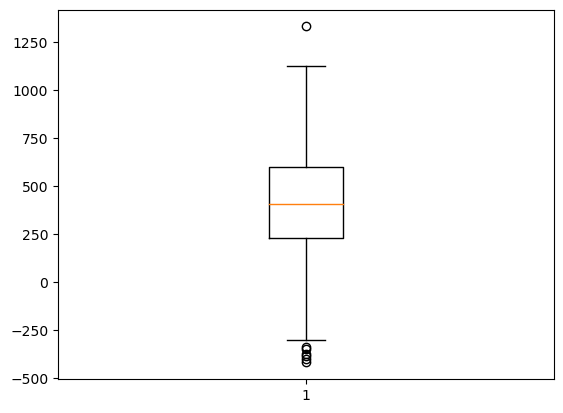

In [107]:
print('3 регион')
print('')
print(strap(df_2['real_product'], df_2['predicted_product'], 500))

Удивительно. Самый прибыльный регион оказался второй, хотя суммарный запас сырья там меньше. Средняя выручка составила 456 млн., на втором месте регион 3 и на последнем месте регион 1. Разница у них 10 млн. рублей.

Лучше всего модель обучилась на втором регионе. RMSE 0.88. Второй регион имеет самую высокую доверительную границу нижнего интервала. Выбор очевиден. Второй регион точно не подведет.